In [1]:
#Assignment 7

In [36]:
import numpy as np
from astropy import constants as cn
from astropy import units as un
import matplotlib.pyplot as plt
import scipy.integrate as spi
from scipy.integrate import odeint
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from scipy import optimize
from scipy import stats
from scipy import integrate

In [133]:
#defining constants just in case we need
c = (cn.c).value
G = (cn.G).value
L_sun = (cn.L_sun).value
R_sun = (cn.R_sun).value
M_sun = (cn.M_sun).value
kB = (cn.k_B).value
pi = np.pi

In [31]:
#1) just info, nothing to answer

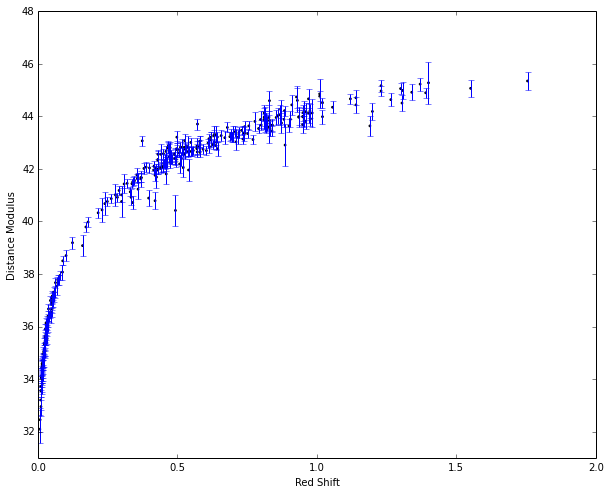

In [47]:
#2)a)
zDat = np.loadtxt('SN.dat', usecols=[1])
mu = np.loadtxt('SN.dat', usecols=[2])
sigma = np.loadtxt('SN.dat', usecols=[3])
fig = plt.figure(1, figsize=(10,8))
plt.scatter(z, mu, s=3)
plt.errorbar(z, mu, yerr=sigma, linestyle="None")
plt.xlim(xmin=0.0)
plt.ylim(ymin=31)
plt.xlabel("Red Shift")
plt.ylabel("Distance Modulus")

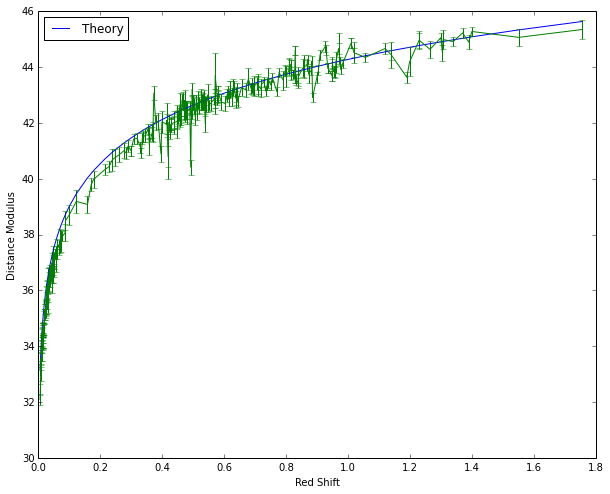

In [138]:
#2b)
hKnot = 0.7
stepSize = len(zDat)
zDat = np.genfromtxt('SN.dat', usecols=(1))
muDat = np.genfromtxt('SN.dat', usecols=(2))
errDat = np.genfromtxt('SN.dat', usecols=(3))
    
def EFunc(z, param):
    param = h, omegaM 
    omegaL = 1.0 - omegaM 
    EFunc = (3000.0 / h) / (np.sqrt(omegaM * ((1.0 + z)**3) + omegaL)) 
    return EFunc

def dC(z, param):
    dC = []
    param = h, omegaM  
    eIntegrate = lambda z: EFunc(z, param)
    for i in range(stepSize): 
        eIntegral = integrate.quad(eIntegrate, 0.0, z[i]) 
        dC.append(eIntegral[0])
    return dC

def dL(z, param):
    param = h, omegaM 
    dL = dC(z, param)* (1.0 + z)
    return dL

def muFunc(z, param):
    muFunc = [] 
    param = h, omegaM 
    muFunc = 25.0 - 5.0 * np.log10(h) + 5.0 * np.log10 (dL (z, param))
    return muFunc

plt.figure(2, figsize=(10,8))
plt.plot(z, muFunc(z, params0), label = 'Theory')
plt.errorbar(z, mu, yerr=sigma)
plt.legend(fontsize = 12, loc = 2)
plt.xlabel("Red Shift")
plt.ylabel("Distance Modulus")

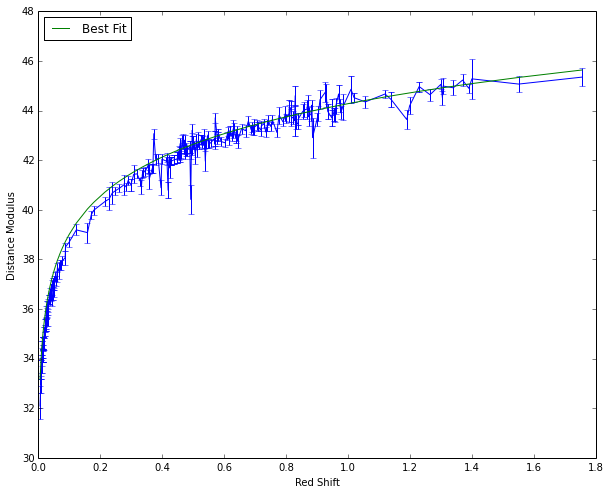

In [139]:
#3)
omegaM1 = 1.0
omegaM23 = 0.23

param1 = [hKnot, omegaM23]

hKnot = 0.7
stepSize = len(zDat)
zDat = np.genfromtxt('SN.dat', usecols=(1))
muDat = np.genfromtxt('SN.dat', usecols=(2))
errDat = np.genfromtxt('SN.dat', usecols=(3))
    
def EFunc(z, param):
    param = h, omegaM 
    omegaL = 1.0 - omegaM 
    EFunc = (3000.0 / h) / (np.sqrt(omegaM * ((1.0 + z)**3) + omegaL)) 
    return EFunc

def dC(z, param):
    dC = []
    param = h, omegaM  
    eIntegrate = lambda z: EFunc(z, param)
    for i in range(stepSize): 
        eIntegral = integrate.quad(eIntegrate, 0.0, z[i]) 
        dC.append(eIntegral[0])
    return dC

def dL(z, param):
    param = h, omegaM 
    dL = dC(z, param)* (1.0 + z)
    return dL

def muFunc(z, param):
    muFunc = [] 
    param = h, omegaM 
    muFunc = 25.0 - 5.0 * np.log10(h) + 5.0 * np.log10 (dL (z, param))
    return muFunc

def chi2(param, args=(zDat, muDat, errDat)):
    param = h, omegaM
    muFuncKnot = muFunc(zDat, param)
    for i in range(stepSize):
        chi2 = 0.0
        chi2 = (((mu[i] - muFuncKnot[i]), 2.0) / (errDat[i]))**2 + chi2
    return chi2

makeFit = lambda param, z: muFunc(z, param)
errfunc = lambda param, z, y: makeFit(param, z)
plt.figure(figsize=(10,8))
plt.errorbar(z, mu, yerr=err)
plt.plot(z, MU(z, p1), label='Best Fit')
plt.legend(fontsize = 12, loc = 2)
plt.xlabel("Red Shift")
plt.ylabel("Distance Modulus")